<a href="https://colab.research.google.com/github/MatteoGuglielmi-tech/Polarity-and-Subjectivity-Detection/blob/main/src/MyModel/BERT_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bert-Model


In [ ]:
!nvidia-smi

Sun Oct 30 20:49:31 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


### Steps to import python files in Collaboratory
- go to Google Drive where the Jupyter Notebook containing the desired functions to import is
- download it with the .py extension
- run the following cell to put it in the content space

In this particular case we would need to import as a module the NTN file, containing the Neural Tensor Network implementation

In [ ]:
from google.colab import files

files.upload()

Saving NTN.py to NTN (1).py


{'NTN.py': b'# -*- coding: utf-8 -*-\n"""Copy of NTN.ipynb\n\nAutomatically generated by Colaboratory.\n\nOriginal file is located at\n    https://colab.research.google.com/drive/1-96pLYKa38EHk1zHjTD-l8fnuXagGFSl\n\n### NTN (Neural Tensor Network) [[reference_paper](https://proceedings.neurips.cc/paper/2013/file/b337e84de8752b27eda3a12363109e80-Paper.pdf)]\n\n<u><i>Goal</i></u> : state if two entities $(e_1, e_2)$ are in a certain relationship $R$.   \n>Ex. defines whehter $$(e_1, R, e_2) = (\\text{Bengal tiger}, \\text{has part}, \\text{tail})$$ is true and with which certainty.\n\n- $e_1$ and $e_2$ are vector representations or features of the two entities.\n- NTN, unlike a linear canoncical NN layer, uses a bilinear tensor layer that directly relates two entity vectors across differet dimensions.\n- Model computes a score of how likely it is two entities are in a specific position following : $$g(e_1, R, e_2) = u_R^Tf\\biggr(e_i^T W_R^{[1:K]}e_2+V_R \\begin{align}\n    \\begin{bmatr

In [ ]:
import NTN

In [ ]:
import pandas as pd 
import numpy as np 
import re

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import gc
from typing import Tuple, List
import torch.optim as opt

In [ ]:
def load_embeds(folder: str, kind:str)-> np.ndarray:
    output = np.load(root+f"BERT/{folder}/bert_emb_{kind}_100.npy")
    for i in range(1,20):
        tmp = np.load(root+f"BERT/{folder}/bert_emb_{kind}_{(i+1)*100}.npy")
        print(f"iteration {i}\n")
        print(f"len tmp {len(tmp)}\n")
        output = np.concatenate((output,tmp))
        print(f"len {kind}_embs {len(output)}\n")
        gc.collect()
    return output

In [ ]:
root = '/content/gdrive/MyDrive/Colab Notebooks/Polarity-Subjectivity-Detection/'

In [ ]:
pol_embs = load_embeds(folder='Polarity-Embeddings-Truncated', kind='pol')

iteration 1

len tmp 100

len pol_embs 200

iteration 2

len tmp 100

len pol_embs 300

iteration 3

len tmp 100

len pol_embs 400

iteration 4

len tmp 100

len pol_embs 500

iteration 5

len tmp 100

len pol_embs 600

iteration 6

len tmp 100

len pol_embs 700

iteration 7

len tmp 100

len pol_embs 800

iteration 8

len tmp 100

len pol_embs 900

iteration 9

len tmp 100

len pol_embs 1000

iteration 10

len tmp 100

len pol_embs 1100

iteration 11

len tmp 100

len pol_embs 1200

iteration 12

len tmp 100

len pol_embs 1300

iteration 13

len tmp 100

len pol_embs 1400

iteration 14

len tmp 100

len pol_embs 1500

iteration 15

len tmp 100

len pol_embs 1600

iteration 16

len tmp 100

len pol_embs 1700

iteration 17

len tmp 100

len pol_embs 1800

iteration 18

len tmp 100

len pol_embs 1900

iteration 19

len tmp 100

len pol_embs 2000



In [ ]:
subj_embs = load_embeds(folder='Subjectivity-Embeddings-Truncated', kind='subj')

iteration 1

len tmp 100

len subj_embs 200

iteration 2

len tmp 100

len subj_embs 300

iteration 3

len tmp 100

len subj_embs 400

iteration 4

len tmp 100

len subj_embs 500

iteration 5

len tmp 100

len subj_embs 600

iteration 6

len tmp 100

len subj_embs 700

iteration 7

len tmp 100

len subj_embs 800

iteration 8

len tmp 100

len subj_embs 900

iteration 9

len tmp 100

len subj_embs 1000

iteration 10

len tmp 100

len subj_embs 1100

iteration 11

len tmp 100

len subj_embs 1200

iteration 12

len tmp 100

len subj_embs 1300

iteration 13

len tmp 100

len subj_embs 1400

iteration 14

len tmp 100

len subj_embs 1500

iteration 15

len tmp 100

len subj_embs 1600

iteration 16

len tmp 100

len subj_embs 1700

iteration 17

len tmp 100

len subj_embs 1800

iteration 18

len tmp 100

len subj_embs 1900

iteration 19

len tmp 100

len subj_embs 2000



In [ ]:
print(len(subj_embs))

2000


In [ ]:
print(pol_embs[0].shape)
print(pol_embs[1999].shape)

(64, 768)
(64, 768)


In [ ]:
print(subj_embs[0].shape)
print(subj_embs[1999].shape)

(64, 768)
(64, 768)


In [ ]:
gc.collect()

88

In [ ]:
print(len(pol_embs))
print(type(pol_embs))

2000
<class 'numpy.ndarray'>


In [ ]:
print(len(subj_embs))
print(type(subj_embs))

2000
<class 'numpy.ndarray'>


In [ ]:
gc.collect()

66

## Train/Test split
Preparing the data to be fed to the model

In [ ]:
pol_labels = [1 if idx<1000 else 0 for idx in range(2000)]

In [ ]:
pos = pol_labels[:1000]
neg = pol_labels[1000:]

In [ ]:
len(pos)

1000

In [ ]:
import torch
inp = torch.arange(1,16).reshape(5,3)
label = torch.randint(1,3,size=(5,))
print(inp)
print(label)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])
tensor([2, 2, 1, 1, 2])


In [ ]:
from torch.utils.data import TensorDataset as td

ds = td(inp, label)
for inp, label in ds:
    print('{}:{}'.format(inp, label))

tensor([1, 2, 3]):2
tensor([4, 5, 6]):2
tensor([7, 8, 9]):1
tensor([10, 11, 12]):1
tensor([13, 14, 15]):2


In [ ]:
next(iter(ds))

(tensor([1, 2, 3]), tensor(2))

In [ ]:
len(neg)

1000

In [ ]:
subj_labels = [1 if idx<1000 else 0 for idx in range(2000)]

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, RandomSampler
from torch.utils.data import TensorDataset as td

def get_data(pol_embs: List[np.array], subj_embs: List[np.array], pol_labels: List[np.array], 
             subj_labels: List[np.array], batch_size: int=64, random_state=42, 
             test_split=0.2) -> Tuple[torch.utils.data.DataLoader]:

    pol_train, pol_test, pol_labels_train, pol_labels_test = train_test_split(pol_embs, 
                                                                            pol_labels,
                                                                            test_size=test_split, 
                                                                            random_state=random_state)
    
    subj_train, subj_test, subj_labels_train, subj_labels_test = train_test_split(subj_embs, 
                                                                                  subj_labels,
                                                                                  test_size=test_split,
                                                                                  random_state=random_state)

    pol_train = td(torch.Tensor(pol_train), torch.Tensor(pol_labels_train))
    pol_test = td(torch.Tensor(pol_test), torch.Tensor(pol_labels_test))
    subj_train = td(torch.Tensor(subj_train), torch.Tensor(subj_labels_train))
    subj_test = td(torch.Tensor(subj_test), torch.Tensor(subj_labels_test))

    
    pol_train_loader = DataLoader(dataset=pol_train, 
                                  batch_size=batch_size,
                                  sampler=RandomSampler(pol_train), 
                                  shuffle=False)
    
    pol_test_loader = DataLoader(dataset=pol_test, 
                                 batch_size=batch_size,
                                 sampler=RandomSampler(pol_test), 
                                 shuffle=False)

    subj_train_loader = DataLoader(dataset=subj_train, 
                                   batch_size=batch_size,
                                   sampler=RandomSampler(subj_train),
                                   shuffle=False)
    
    subj_test_loader = DataLoader(dataset=subj_test,
                                  batch_size=batch_size,
                                  sampler=RandomSampler(subj_test), 
                                  shuffle=False)
    
    return pol_train_loader, pol_test_loader, subj_train_loader, subj_test_loader

In [ ]:
#pol_train = get_data(pol_embs=pol_embs, 
#                     subj_embs=subj_embs, 
#                     pol_labels=pol_labels,
#                     subj_labels=subj_labels)

In [ ]:
#for inp, label in pol_train:
#    print('{}:{}'.format(inp, label))

In [ ]:
pol_train, pol_val, subj_train, subj_val = get_data(pol_embs=pol_embs, 
                                                    subj_embs=subj_embs,
                                                    pol_labels=pol_labels,
                                                    subj_labels=subj_labels,
                                                    batch_size=64)

In [ ]:
for idx, (datum, label) in enumerate(pol_train):
    print(f"Batch : {idx}\nTensor: {datum}{label}\n")
    break

Batch : 0
Tensor: tensor([[[ 6.8084e-02,  2.0254e-01,  2.9425e-01,  ..., -5.0048e-01,
           2.5717e-01,  1.4187e-01],
         [ 4.8316e-01,  8.7344e-01,  6.5007e-01,  ..., -1.8418e-01,
          -4.3197e-01, -4.5077e-02],
         [ 6.9569e-01,  4.8294e-01,  2.6602e-01,  ..., -3.3281e-01,
           2.6116e-01, -4.6041e-01],
         ...,
         [-1.4071e-01, -1.8084e-01,  6.2079e-01,  ..., -2.2176e-01,
           1.0505e-01,  3.0191e-01],
         [ 1.4144e-01, -1.7395e-01,  2.9814e-01,  ..., -3.1334e-02,
          -2.5794e-03, -2.1174e-01],
         [ 5.6633e-01,  3.8859e-01, -1.2269e-02,  ..., -2.7702e-01,
          -2.7814e-01, -2.2136e-02]],

        [[-7.1250e-01,  8.6841e-02,  5.2096e-02,  ..., -6.6231e-01,
           2.9533e-01,  2.4925e-01],
         [ 3.3336e-01,  3.1329e-01, -6.8843e-03,  ..., -1.9575e-01,
           3.2910e-01, -5.3600e-01],
         [ 2.2442e-01,  4.4772e-01,  2.9213e-01,  ..., -7.1130e-02,
          -4.1257e-01, -6.2229e-01],
         ...,
       

In [ ]:
data, labels = next(iter(subj_train))

In [ ]:
print(data[0])

tensor([[-0.4787, -0.1746, -0.4600,  ...,  0.0327,  0.5050,  0.4062],
        [-0.1598, -0.3907,  0.1687,  ...,  0.1265,  1.0619, -0.4778],
        [-0.2340, -0.1240,  0.4319,  ...,  0.4136,  0.3076, -0.6100],
        ...,
        [ 0.3629, -0.3123,  0.1869,  ...,  0.0188,  0.1148, -0.1291],
        [-0.1373, -0.2036,  0.0750,  ..., -0.0640, -0.0707, -0.1838],
        [ 0.1338, -0.1474,  0.1513,  ..., -0.0489, -0.1498, -0.3025]])


In [ ]:
print(labels[0])

tensor(0.)


## Model assembly

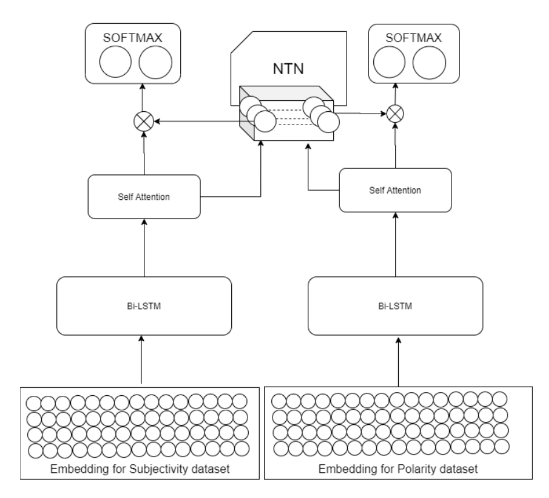

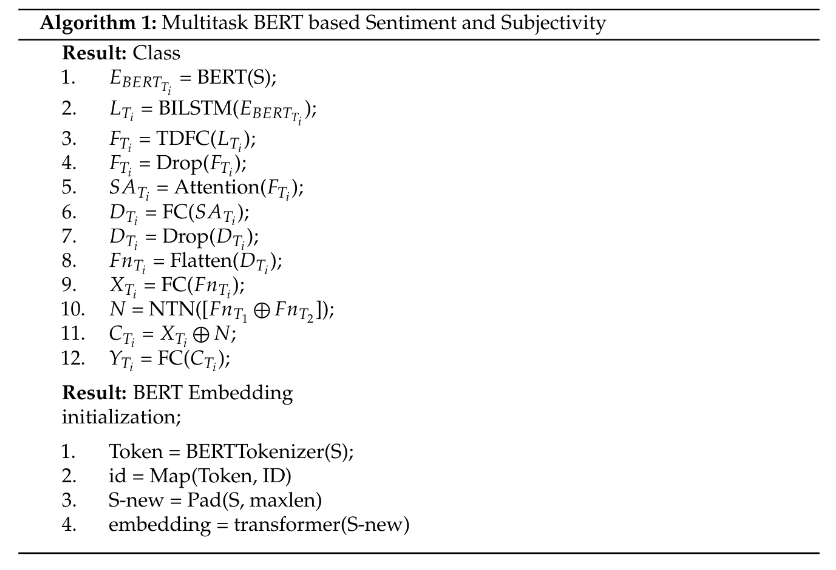


In [ ]:
class TimeDistributed(nn.Module):
    def __init__(self, module, batch_first=False):
        super(TimeDistributed, self).__init__()
        self.module = module
        self.batch_first = batch_first

    def forward(self, x):

        if len(x.size()) <= 2:
            return self.module(x)

        # Squash samples and timesteps into a single axis
        x_reshape = x.contiguous().view(-1, x.size(-1))  # (samples * timesteps, input_size)

        y = self.module(x_reshape)

        # We have to reshape Y
        if self.batch_first:
            y = y.contiguous().view(x.size(0), -1, y.size(-1))  # (samples, timesteps, output_size)
        else:
            y = y.view(-1, x.size(1), y.size(-1))  # (timesteps, samples, output_size)

        return y

In [ ]:
import math
import torch.nn.functional as F

In [ ]:
def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    attn_logits = torch.matmul(q, k.transpose(-2, -1))
    attn_logits = attn_logits / math.sqrt(d_k)
    if mask is not None:
        attn_logits = attn_logits.masked_fill(mask == 0, -9e15)
    attention = F.softmax(attn_logits, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

In [ ]:
# https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial6/Transformers_and_MHAttention.html
class MultiheadAttention(nn.Module):

    def __init__(self, input_dim, embed_dim, num_heads):
        super().__init__()
        assert embed_dim % num_heads == 0, "Embedding dimension must be 0 modulo number of heads."

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        # Stack all weight matrices 1...h together for efficiency
        # Note that in many implementations you see "bias=False" which is optional
        self.qkv_proj = nn.Linear(input_dim, 3*embed_dim)
        self.o_proj = nn.Linear(embed_dim, embed_dim)

        self._reset_parameters()

    def _reset_parameters(self):
        # Original Transformer initialization, see PyTorch documentation
        nn.init.xavier_uniform_(self.qkv_proj.weight)
        self.qkv_proj.bias.data.fill_(0)
        nn.init.xavier_uniform_(self.o_proj.weight)
        self.o_proj.bias.data.fill_(0)

    def forward(self, x, mask=None, return_attention=False):
        batch_size, seq_length, _ = x.size()
        qkv = self.qkv_proj(x)

        # Separate Q, K, V from linear output
        qkv = qkv.reshape(batch_size, seq_length, self.num_heads, 3*self.head_dim)
        qkv = qkv.permute(0, 2, 1, 3) # [Batch, Head, SeqLen, Dims]
        q, k, v = qkv.chunk(3, dim=-1)

        # Determine value outputs
        values, attention = scaled_dot_product(q, k, v, mask=mask)
        values = values.permute(0, 2, 1, 3) # [Batch, SeqLen, Head, Dims]
        values = values.reshape(batch_size, seq_length, self.embed_dim)
        o = self.o_proj(values)

        if return_attention:
            return o, attention
        else:
            return o

In [91]:
class MTL(nn.Module):

    def __init__(self, num_heads: int):
        super().__init__()
        # https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        self.lstm1 = nn.Sequential(nn.LSTM(input_size=768, hidden_size=128, dropout=0.2, bidirectional=True))
        #self.LSTM1 = nn.LSTM(input_size=768, hidden_size=128, dropout=0.2, bidirectional=True)
        self.lstm2 = nn.Sequential(nn.LSTM(input_size=768, hidden_size=128, dropout=0.2, bidirectional=True))

        #self.dense1 = TimeDistributed(nn.Linear(in_features=128, out_features=128))
        #self.dense2 = TimeDistributed(nn.Linear(in_features=128, out_features=128))

        # dense layers
        self.dense1 = nn.Sequential(
            nn.Linear(in_features=256, out_features=128),
            nn.ReLU(inplace=True)
            )
        

        self.dense2 = nn.Sequential(
            nn.Linear(in_features=256, out_features=128),
            nn.ReLU(inplace=True)
            )
        
        # dropout layers
        self.drop1 = nn.Dropout(p=0.5)
        self.drop2 = nn.Dropout(p=0.5)

        # self-attention layers
        # https://pytorch.org/docs/stable/generated/torch.nn.MultiheadAttention.html
        self.attention1 = nn.MultiheadAttention(embed_dim=256, num_heads=num_heads)
        self.attention2 = nn.MultiheadAttention(embed_dim=256, num_heads=num_heads)

        #self.dense11 = nn.Linear(in_features=)
        #return self.attention1, self.attention2

    def forward(self, emb1, emb2) -> Tuple:
        # https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        pol_out, (h_pol, c_pol) = self.lstm1(emb1)
        pol_hidden = torch.cat((pol_out[:,-1,:128], pol_out[:,0,128:]), dim=1)
        
        subj_out, (h_subj, c_subj) = self.lstm2(emb2)
        subj_hidden = torch.cat((subj_out[:,-1,:128], subj_out[:,0,128:]), dim=1)

        #pol = self.dense1(pol_hidden.view(-1, 128*2))
        #subj = self.dense2(subj_out.view(-1, 128*2))

        drop1 = self.drop1(subj_out)
        drop2 = self.drop2(subj_out)

        # https://stackoverflow.com/questions/65642832/inputs-to-the-nn-multiheadattention
        attn_out1, _ = self.attention1(query=drop1, key=drop1, value=drop1)
        attn_out2, _ = self.attention2(query=drop2, key=drop2, value=drop2)

        return attn_out1, attn_out2
        

In [ ]:
def cross_entropy_loss():
    return torch.nn.CrossEntropyLoss()

In [ ]:
def get_optimizer(net, lr: float=0.0002):
    return opt.Adam(net.params(), lr=lr)

In [89]:
def training_step(model, pol_train: torch.utils.data.DataLoader, 
                  sub_train: torch.utils.data.DataLoader, device: str = 'cuda:0') -> Tuple[float]:
    
    samples = 0.
    cumulative_loss = 0.
    cumulative_accuracy = 0.
  
    model.train() 

    subj_train_iter = iter(sub_train)
 
    # iterate over the training set
    for batch_idx, (pol_tensor, pol_label) in enumerate(pol_train):

        # print(pol_tensor.size()) -> torch.Size([64, 64, 768])
        # print(pol_label.size()) -> [64]

        # load polarity data to GPU
        pol_inputs = pol_tensor.to(device)
        pol_targets = pol_label.to(device)

        # print(subj_inputs.size()) -> torch.Size([64, 64, 768])
        # print(subj_labels.size()) -> [64]

        # load subjectivity data to GPU
        subj_inputs, subj_labels = next(subj_train_iter)
        subj_inputs = subj_inputs.to(device)
        subj_labels = subj_labels.to(device)
        
        # forward pass -> the output should be two vecotors.
        # as a consequence two losses
        pol_out, subj_out = model(pol_inputs, subj_inputs)
        print(f"pol_out : {pol_out}\n subj_out : {subj_out}")
        print(pol_out.size(), subj_out.size())

        # loss computation
        #pol_loss = cross_entropy_loss(pol_out, pol_targets)
        #sub_loss = cross_entropy_loss(subj_inputs, subj_targets)
        
        # backward pass
        #pol_loss.backward()
        #sub_loss.backward()
    
        # parameters update
        #get_optimizer.step()

        # gradients reset
        #get_optimizer.zero_grad()

        # fetch prediction and loss value for polarity 
        #samples_pol += pol_inputs.shape[0]
        #cumulative_loss_pol += pol_loss.item()
        #_, predicted_pol = pol_out.max(dim=1) # max() returns (maximum_value, index_of_maximum_value)

        # compute training accuracy
        #cumulative_accuracy_pol += predicted_pol.eq(pol_targets).sum().item()
        
        # fetch prediction and loss value for subjectivity dataset
        #samples_sub += sub_inputs.shape[0]
        #cumulative_loss_sub += sub_loss.item()
        #_, predicted_sub = sub_out.max(dim=1) # max() returns (maximum_value, index_of_maximum_value)

        # compute training accuracy
        #cumulative_accuracy_sub += predicted_sub.eq(sub_targets).sum().item()

    #return cumulative_loss_pol/samples_pol,(cumulative_accuracy_pol/samples_pol)*100, cumulative_loss_sub/samples_sub, (cumulative_accuracy_sub/samples_sub)*100    

In [ ]:
def test_step(net, pol_test: torch.utils.data.DataLoader, 
              sub_test: torch.utils.data.DataLoader, 
              device='cuda:0')->Tuple[float]:

    samples = 0.
    cumulative_loss = 0.
    cumulative_accuracy = 0.

    net.eval()
    sub_test = iter(sub_train)

    with torch.no_grad():

        for batch_idx, item in enumerate(pol_test):

            # load data into GPU
            pol_inputs = item[0].to(device)
            pol_targets = item[1].to(device)

            sub_inputs = sub_test[0].to(device)
            sub_targets = sub_test[1].to(device)
        
            # forward pass
            pol_out, sub_out = net(pol_inputs, sub_inputs)

            # apply the loss
            pol_loss = cross_entropy_loss(pol_out, pol_targets)
            sub_loss = cross_entropy_loss(sub_inputs, sub_targets)

            sub_train = next(sub_train)
        
            # backward pass
            pol_loss.backward()
            sub_loss.backward()

            # fetch prediction and loss value for polarity 
            samples_pol += pol_inputs.shape[0]
            cumulative_loss_pol += pol_loss.item()
            _, predicted_pol = pol_out.max(dim=1) # max() returns (maximum_value, index_of_maximum_value)

            # compute training accuracy
            cumulative_accuracy_pol += predicted_pol.eq(pol_targets).sum().item()
        
            # fetch prediction and loss value for subjectivity dataset
            samples_sub += sub_inputs.shape[0]
            cumulative_loss_sub += sub_loss.item()
            _, predicted_sub = sub_out.max(dim=1) # max() returns (maximum_value, index_of_maximum_value)

            # compute training accuracy
            cumulative_accuracy_sub += predicted_sub.eq(sub_targets).sum().item()

    
    return cumulative_loss_pol/samples_pol,(cumulative_accuracy_pol/samples_pol)*100, cumulative_loss_sub/samples_sub, (cumulative_accuracy_sub/samples_sub)*100    

In [ ]:
def main(pol_train_loader,
         pol_test_loader,
         sub_train_loader,
         sub_test_loader,
         batch_size=64,
         device='cuda:0',
         epochs=15) -> Tuple[float]:
  
  
    net = MTL(num_heads=4).to(device)
    print('Network Init Done')

    tup = training_step(net, pol_train_loader, sub_train_loader)

    #for e in range(epochs):
    #    print(f"Epoch {e}:")

    #    tup = training_step(net, pol_train_loader, sub_train_loader)
        #pol_train_loss, pol_train_accuracy, sub_train_loss, sub_train_accuracy = training_step(net, pol_train_loader, sub_train_loader)
        #print(f"Polarity training loss: {pol_train_loss} \n Pol training accuracy: {pol_train_accuracy} \n Sub training loss: {sub_train_loss} \n Sub training acuracy: {sub_train_accuracy}")

    # perform final test step and print the final metrics
    #_, test_accuracy = test_step(net, pol_test_loader, sub_test_loader)

    #return test_accuracy

In [92]:
main(pol_train_loader=pol_train, pol_test_loader=pol_val, sub_train_loader=subj_train, sub_test_loader=subj_val)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


Network Init Done
pol_out : tensor([[[-0.0637,  0.0514, -0.0443,  ..., -0.0087, -0.0950,  0.0499],
         [ 0.0117,  0.0157, -0.0403,  ...,  0.0849, -0.0441,  0.0319],
         [-0.0609, -0.0233,  0.0109,  ...,  0.0565, -0.0288,  0.0139],
         ...,
         [-0.0401,  0.0867,  0.0059,  ..., -0.0383,  0.0237,  0.0492],
         [-0.0286,  0.0838,  0.0104,  ..., -0.0367,  0.0221,  0.0293],
         [-0.0490,  0.0640,  0.0215,  ..., -0.0200, -0.0152,  0.0389]],

        [[-0.0632,  0.0509, -0.0432,  ..., -0.0096, -0.0951,  0.0511],
         [ 0.0117,  0.0161, -0.0404,  ...,  0.0850, -0.0433,  0.0324],
         [-0.0622, -0.0232,  0.0103,  ...,  0.0566, -0.0292,  0.0138],
         ...,
         [-0.0403,  0.0868,  0.0056,  ..., -0.0384,  0.0239,  0.0496],
         [-0.0286,  0.0840,  0.0108,  ..., -0.0365,  0.0225,  0.0292],
         [-0.0488,  0.0640,  0.0211,  ..., -0.0199, -0.0156,  0.0386]],

        [[-0.0639,  0.0508, -0.0446,  ..., -0.0096, -0.0947,  0.0499],
         [ 0.0113

In [ ]:
# history=model.fit([senti_train, sub_train], [sentlabel_train,sublabel_train], batch_size= 64, epochs=20, verbose=1, shuffle=True, validation_split=0.2)

### Unused

In [ ]:
#pol_emb = np.load(root + 'pol.npy')
#subj_emb = np.load(root + 'subj_obj.npy')

#pol_embs = np.load(root+'BERT/Polarity-Embeddings/bert_emb_pol_100.npy')
#for i in range(1,20):
#    tmp = np.load(root+f'BERT/Polarity-Embeddings/bert_emb_pol_{(i+1)*100}.npy')
#    print(f"iteration {i}\n")
#    print(f"len tmp {len(tmp)}\n")
#    pol_embs = np.concatenate((pol_embs,tmp))
#    print(f"len pol_embs {len(pol_embs)}\n")

In [ ]:
# first batch. When doing np.save everything is flatten up
# need to rebuild the features to have a list of 2k elements to spit up
print(pol_emb[:64])

In [ ]:
print(pol_emb[0].shape)

In [ ]:
pol_emb_arranged = []

for i in range(0,len(pol_emb)+1, 512):
    if i==0:
        chunk = pol_emb[:512]
    else:    
        chunk = pol_emb[i-512:i]
        pol_emb_arranged.append(chunk)

print(len(pol_emb_arranged))
#print(pol_emb_arranged)

In [ ]:
subj_emb_arranged = []

for i in range(0,len(pol_emb)+1, 512):
    if i==0:
        chunk = subj_emb[:512]
    else:    
        chunk = subj_emb[i-512:i]
        subj_emb_arranged.append(chunk)

print(len(subj_emb_arranged))
#print(pol_emb_arranged)